In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **IMPORTING REQUIREMENTS**

In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **DATASET**

In [4]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/gdrive/MyDrive/tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
65311,0,1690935135,Sun May 03 16:43:00 PDT 2009,NO_QUERY,clarakim,@meocat lol we left chloe at home while we wen...
427296,0,2063709762,Sun Jun 07 03:46:13 PDT 2009,NO_QUERY,clemmief,is tired but one more left and then it is off...
1504748,4,2072228111,Sun Jun 07 20:37:45 PDT 2009,NO_QUERY,candice_1,is procrastinating....exam next saturday =( an...
1598421,4,2193180237,Tue Jun 16 08:06:19 PDT 2009,NO_QUERY,justmejenn,2 years ago today I broke my poor little pinky...
136517,0,1880112840,Fri May 22 00:08:21 PDT 2009,NO_QUERY,JenniferPriest,@jemmen I guess we need to make our own tone l...


In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
print('length of data is', len(df))

length of data is 1600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df. shape

(1600000, 6)

In [9]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

# **EDA**

**Users that Tweet Frequently**

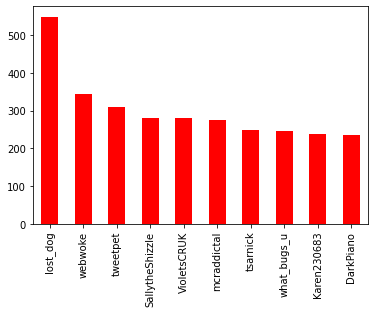

In [10]:
users = df['user'].value_counts()[:10]
users.plot(kind='bar', color='red')

**Distribution of Positive and Negative Tweets**

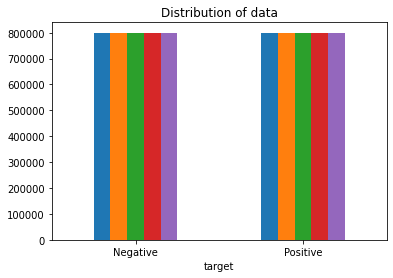

In [11]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

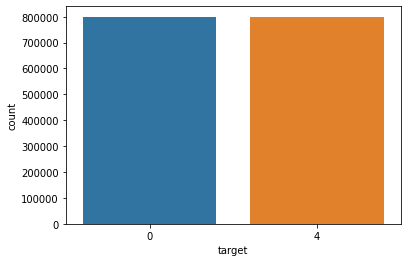

In [12]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [13]:
data=df[['text','target']]

In [14]:
data['target'] = data['target'].replace(4,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


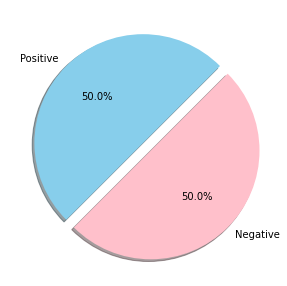

In [15]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[df['target']==4]
neg=data[data['target']==0]
ck=[pos['target'].count(),neg['target'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

**Count of words in the tweet**

In [16]:
corpus = []

word = df['text'].str.split()
new = word.values.tolist()
corpus=[word for i in new for word in i]

In [17]:
stop_words = set(stopwords.words('english'))

<BarContainer object of 14 artists>

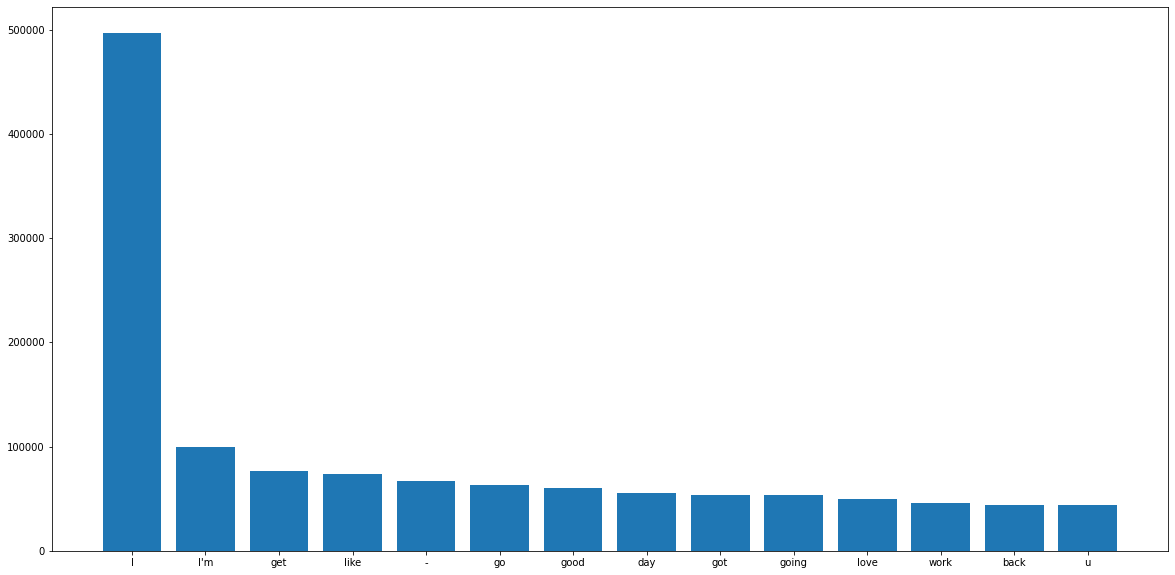

In [18]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common(100)

x, y= [], []
for word,count in most[:50]:
    # can avoid stop words too
    if word not in stop_words:
        x.append(word)
        y.append(count)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

**Top 20 Frequently occuring words in Tweet**

In [19]:
import plotly.express as px

temp = pd.DataFrame.from_records(list(dict(most).items()), columns=['word','count'])
temp1=temp.iloc[:20]
fig = px.pie(temp1,names=temp1["word"] ,values=temp1["count"],title="WORDS IN TWEET")
fig.show()

**Length of Tweets**

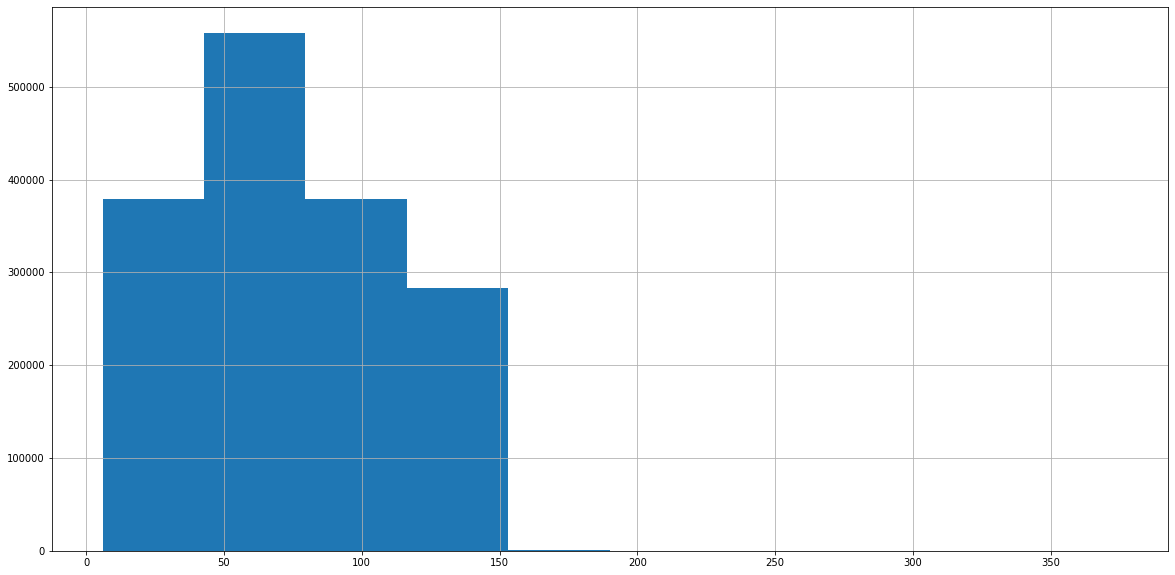

In [20]:
df['text'].str.len().hist()

In [21]:
data['target'].unique()

array([0, 1])

In [22]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

**Count of words in positive tweets**

In [23]:
corpuspos = []

wordpos = data_pos['text'].str.split()
newpos = wordpos.values.tolist()
corpuspos=[wordpos for i in newpos for wordpos in i]

<BarContainer object of 14 artists>

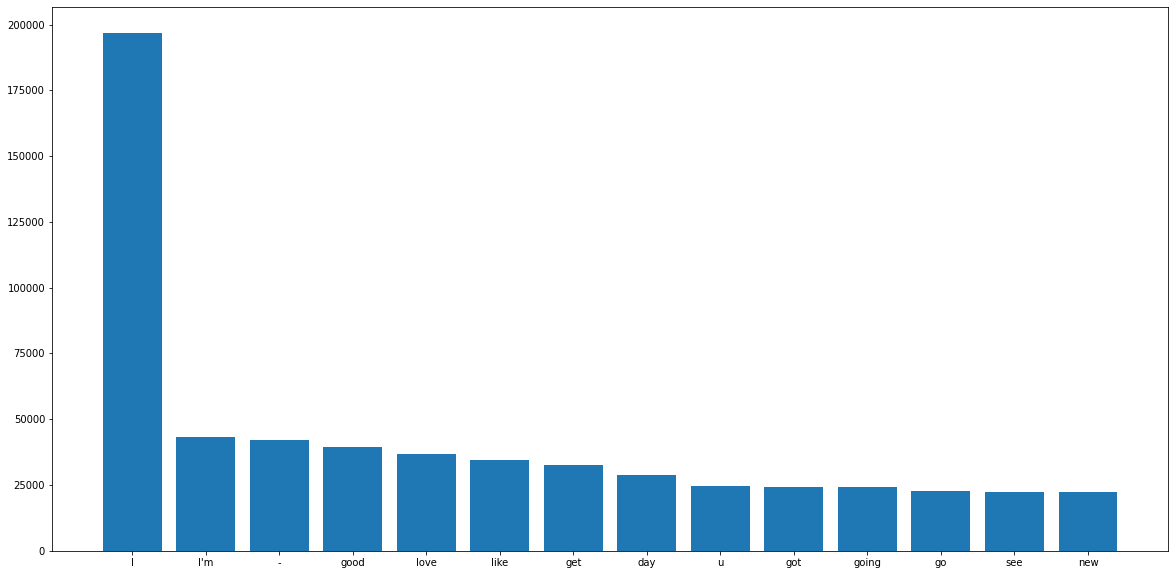

In [24]:
from collections import Counter

counter=Counter(corpuspos)
mostpos=counter.most_common(100)

x, y= [], []
for wordpos,countpos in mostpos[:50]:
    # can avoid stop words too
    if wordpos not in stop_words:
        x.append(wordpos)
        y.append(countpos)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

In [25]:
temppos = pd.DataFrame.from_records(list(dict(mostpos).items()), columns=['Positiveword','count'])
temppos.head()

,Positiveword,count
0,the,246501
1,to,246444
2,I,196797
3,a,190388
4,you,138383


**Top 20 frequent words in positive tweet**

In [26]:
temppos1=temppos.iloc[:20]
fig = px.pie(temppos1,names=temppos1["Positiveword"] ,values=temppos1["count"],title="WORDS IN POSITIVE TWEET")
fig.show()

**Words in Negative Tweet**

In [27]:
corpusneg = []

wordneg = data_neg['text'].str.split()
newneg = wordneg.values.tolist()
corpusneg=[wordneg for i in newneg for wordneg in i]

<BarContainer object of 15 artists>

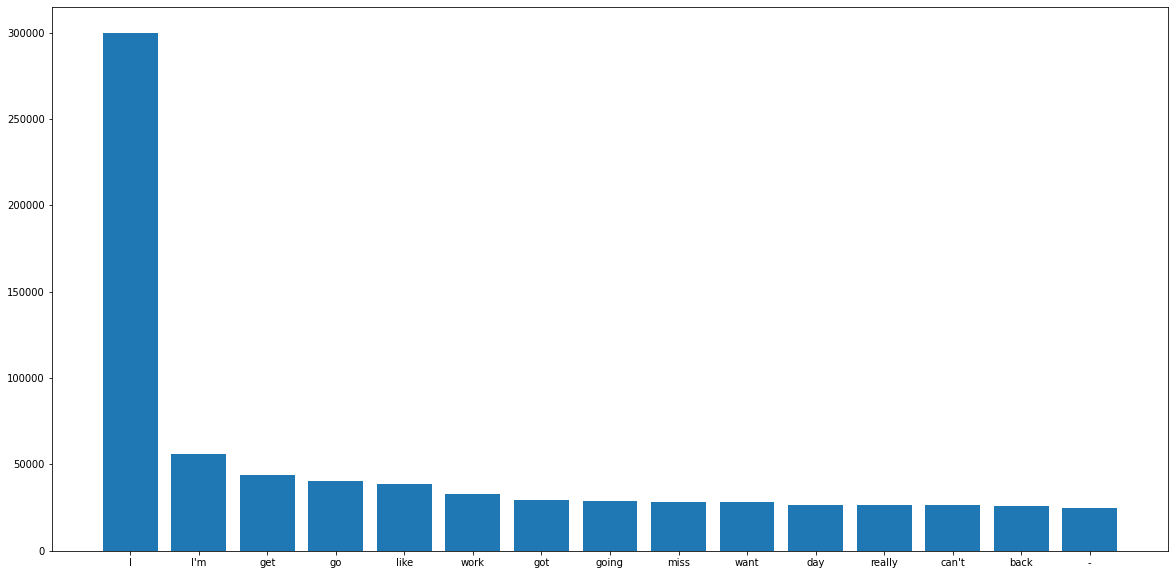

In [28]:
from collections import Counter

counter=Counter(corpusneg)
mostneg=counter.most_common(100)

x, y= [], []
for wordneg,countneg in mostneg[:50]:
    # can avoid stop words too
    if wordneg not in stop_words:
        x.append(wordneg)
        y.append(countneg)
plt.rcParams["figure.figsize"] = (20, 10)       
plt.bar(x,y)

In [29]:
tempneg = pd.DataFrame.from_records(list(dict(mostneg).items()), columns=['Negativeword','count'])
tempneg.head()

,Negativeword,count
0,to,306518
1,I,299822
2,the,241000
3,a,175824
4,my,166917


**Top 20 words in negative tweet**

In [30]:
tempneg1=tempneg.iloc[:20]
fig = px.pie(tempneg1,names=tempneg1["Negativeword"] ,values=tempneg1["count"],title="WORDS IN NEGATIVE TWEET")
fig.show()

**WordCloud**

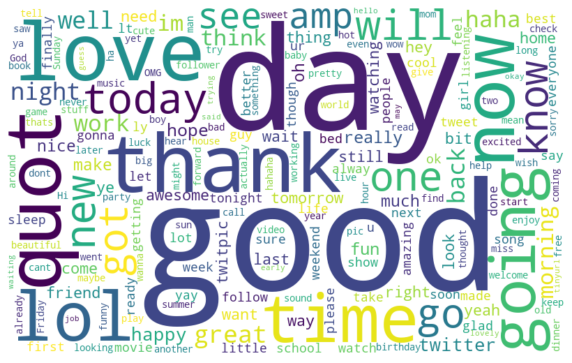

In [31]:
from wordcloud import WordCloud


all_words = ' '.join([text for text in data_pos.text])

wordcloud = WordCloud(width= 800, height= 500,background_color = 'white',collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

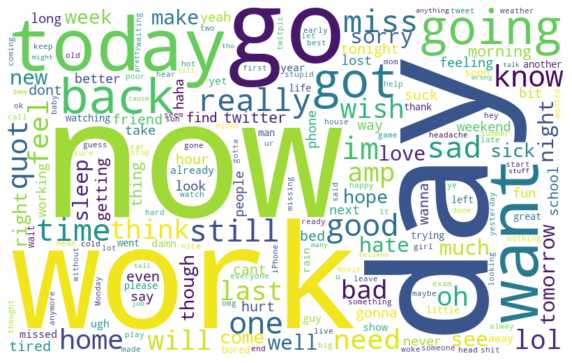

In [32]:
from wordcloud import WordCloud


all_words = ' '.join([text for text in data_neg.text])

wordcloud = WordCloud(width= 800, height= 500,background_color = 'white',collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
data_pos = data_pos.iloc[:int(200000)]
data_neg = data_neg.iloc[:int(200000)]

In [34]:
dataset = pd.concat([data_pos, data_neg])

# **TEXT PRE-PROCESSING**

**Converting Text to Lowercase**

In [35]:
dataset['text']=dataset['text'].str.lower()

In [36]:
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


**Removing punctuations from Text**

In [37]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

199995                                    doesnt feel good 
199996                                          work again 
199997    damienfranco its so common for it to crash now...
199998            my baby boy is wearing big boy underwear 
199999                  fml i forgot my phone charger home 
Name: text, dtype: object

**Removing repeating characters from Text**

In [38]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

199995                                    doesnt feel good 
199996                                          work again 
199997    damienfranco its so common for it to crash now...
199998            my baby boy is wearing big boy underwear 
199999                  fml i forgot my phone charger home 
Name: text, dtype: object

**Removing URL's from Text**

In [39]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

199995                                    doesnt feel good 
199996                                          work again 
199997    damienfranco its so common for it to crash now...
199998            my baby boy is wearing big boy underwear 
199999                  fml i forgot my phone charger home 
Name: text, dtype: object

**Removing numbers from Text**

In [40]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

199995                                    doesnt feel good 
199996                                          work again 
199997    damienfranco its so common for it to crash now...
199998            my baby boy is wearing big boy underwear 
199999                  fml i forgot my phone charger home 
Name: text, dtype: object

**Removing Stopwords from text**

In [41]:
from nltk.tokenize import word_tokenize


def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

dataset.loc[:,"text"] = dataset.text.apply(lambda x: remove_stopWords(x))

**Reducing words to their root-form using PorterStemmer**

In [42]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from nltk.tokenize import sent_tokenize, word_tokenize
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
dataset.loc[:,"text"] = dataset.text.apply(lambda x: stemSentence(x))

In [44]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


**Train-Test Split**

In [45]:
X=dataset.text
y=dataset.target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =42)

**Converting words to Features using Tf-Idf Vectorizer**

In [47]:
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  1599246


In [48]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

**Evaluating Classifier**

In [49]:
def model_Evaluate(model):
# Predict values for Test dataset
      y_pred = model.predict(X_test)
      # Print the evaluation metrics for the dataset.
      print(classification_report(y_test, y_pred))
      # Compute and plot the Confusion matrix
      cf_matrix = confusion_matrix(y_test, y_pred)
      categories = ['Negative','Positive']
      group_names = ['True Neg','False Pos', 'False Neg','True Pos']
      group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
      labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
      labels = np.asarray(labels).reshape(2,2)
      sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
      xticklabels = categories, yticklabels = categories)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
      plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [50]:
X_train

<380000x1599246 sparse matrix of type '<class 'numpy.float64'>'
	with 5352143 stored elements in Compressed Sparse Row format>

In [51]:
y_train

42953     0
56931     0
926055    1
23550     0
829460    1
         ..
59178     0
165838    0
931932    1
946867    1
921958    1
Name: target, Length: 380000, dtype: int64

# **MODELS**

**NAIVE-BAYES**

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      9977
           1       0.79      0.76      0.77     10023

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



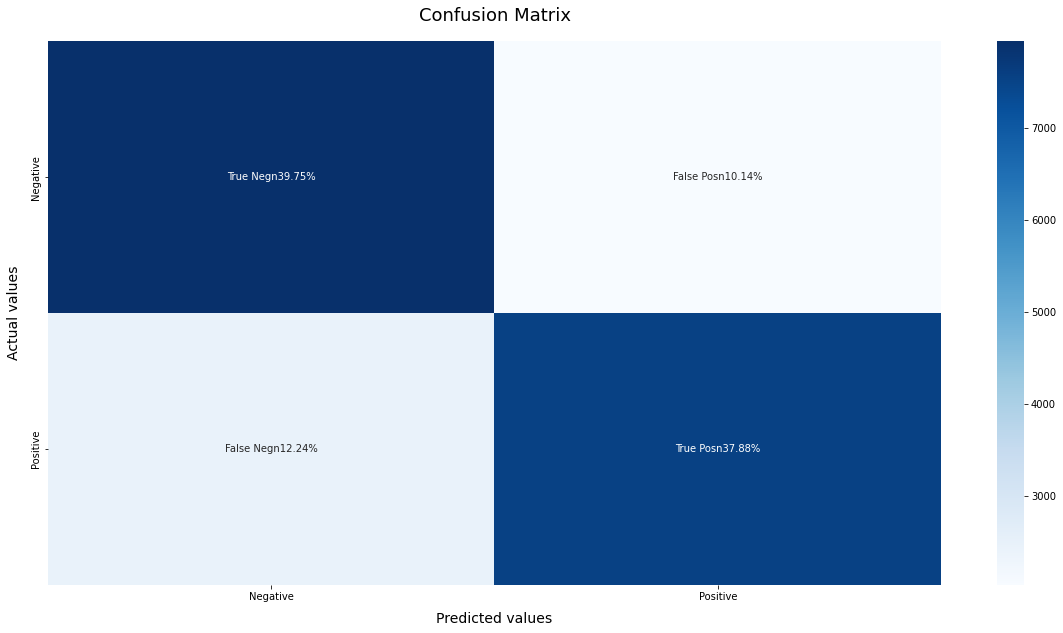

In [52]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

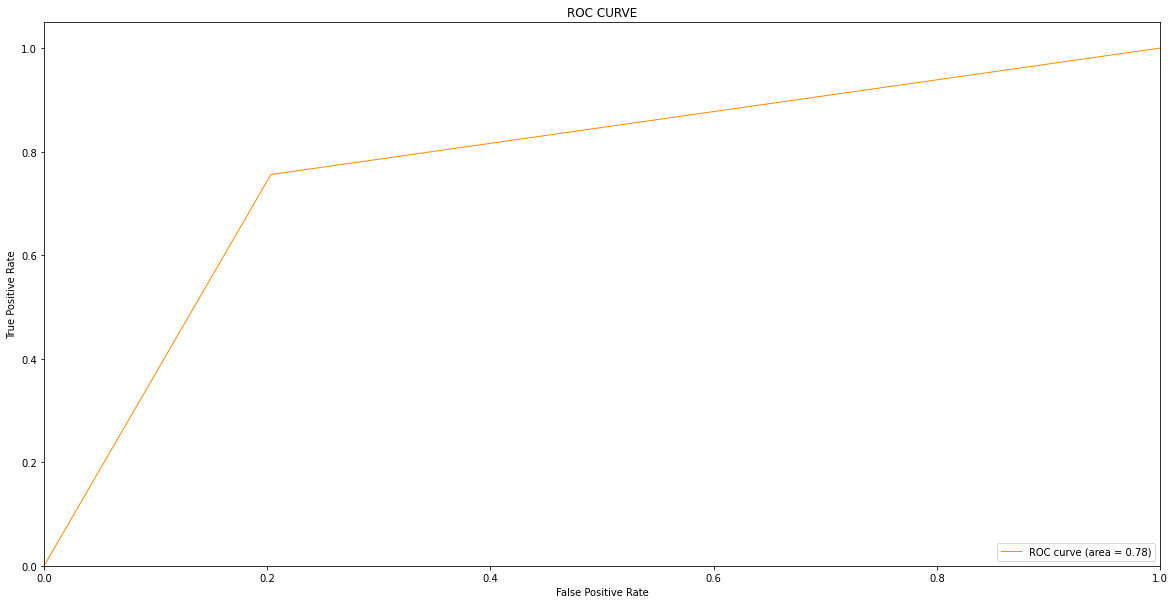

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [54]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      9977
           1       0.79      0.78      0.78     10023

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



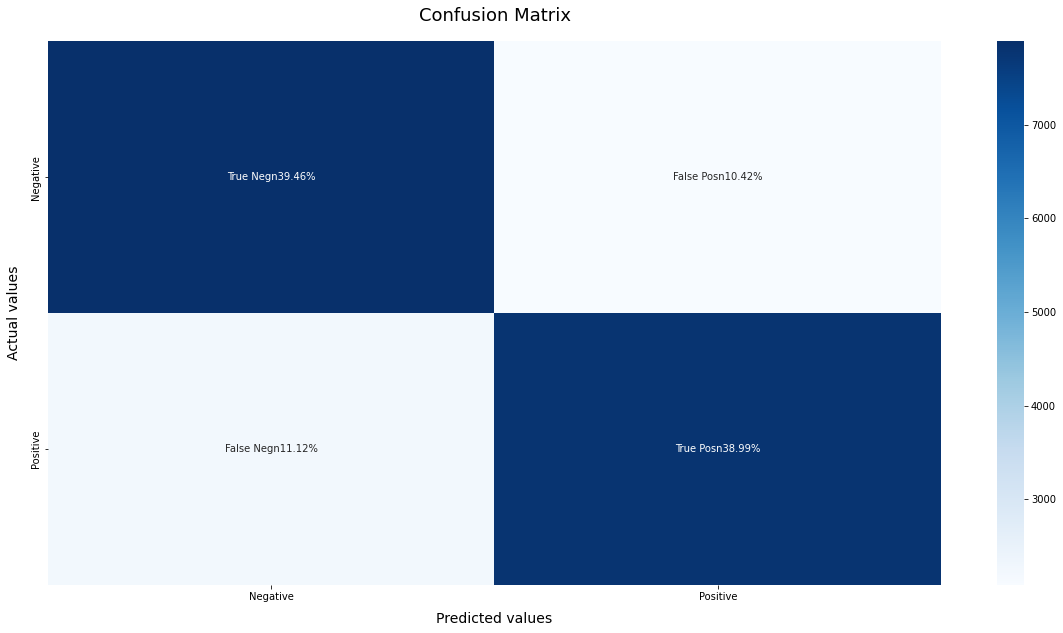

In [55]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

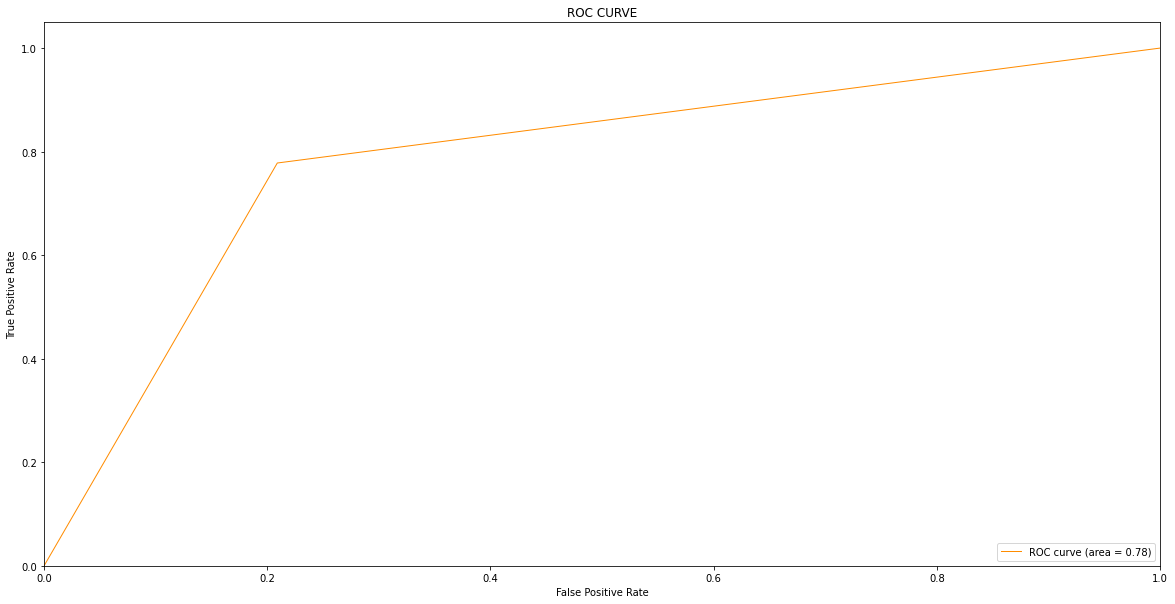

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**LOGISTIC REGRESSION**

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      9977
           1       0.79      0.78      0.79     10023

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



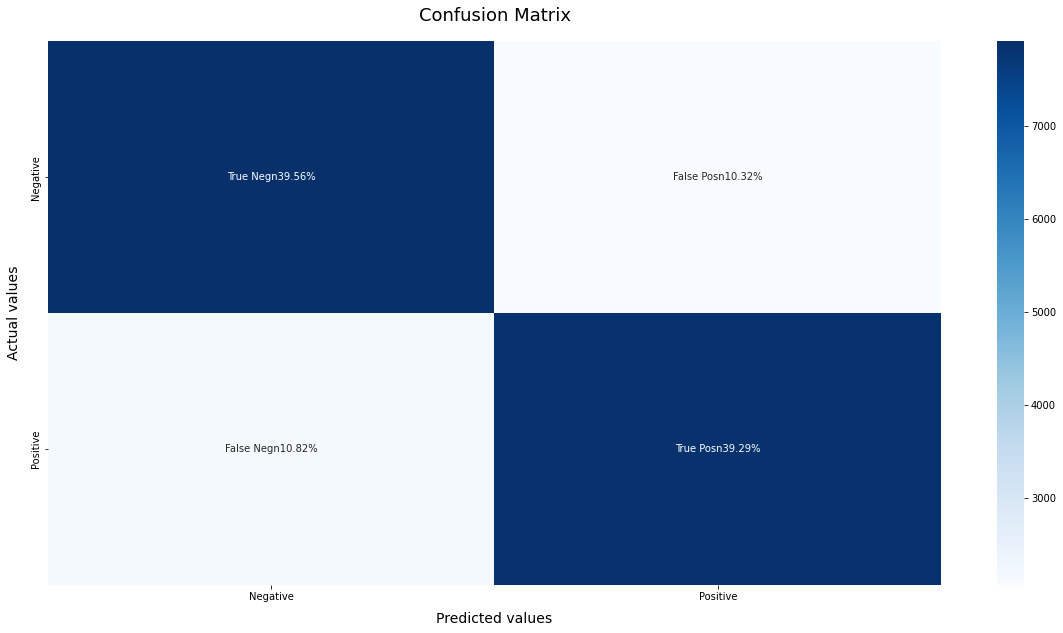

In [57]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


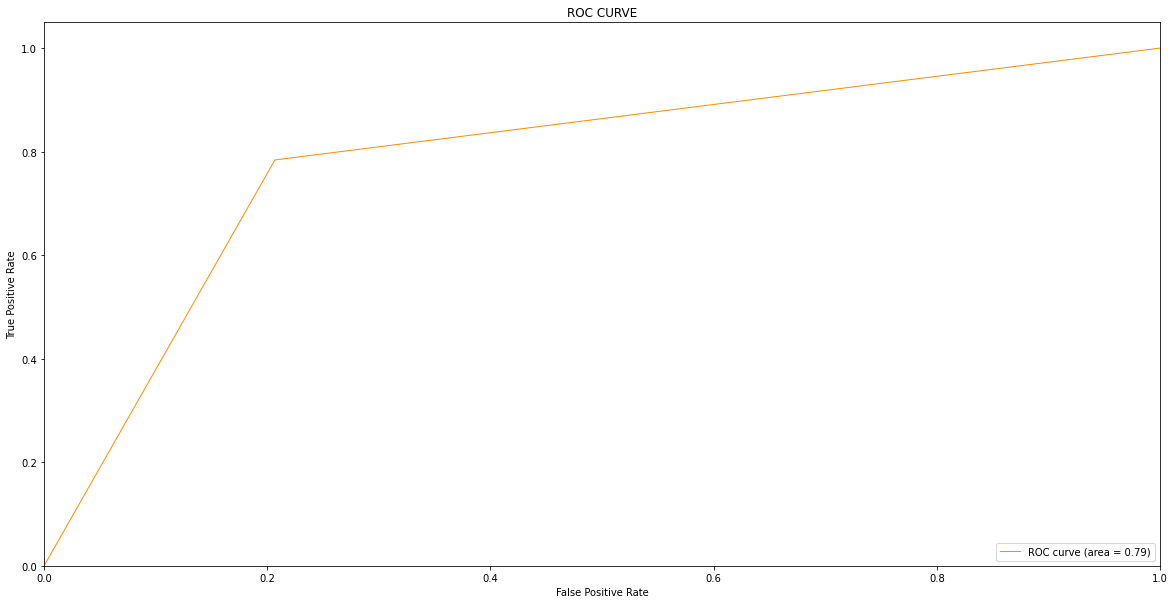

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Perceptron**

In [70]:
from sklearn.linear_model import Perceptron

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9977
           1       0.76      0.74      0.75     10023

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



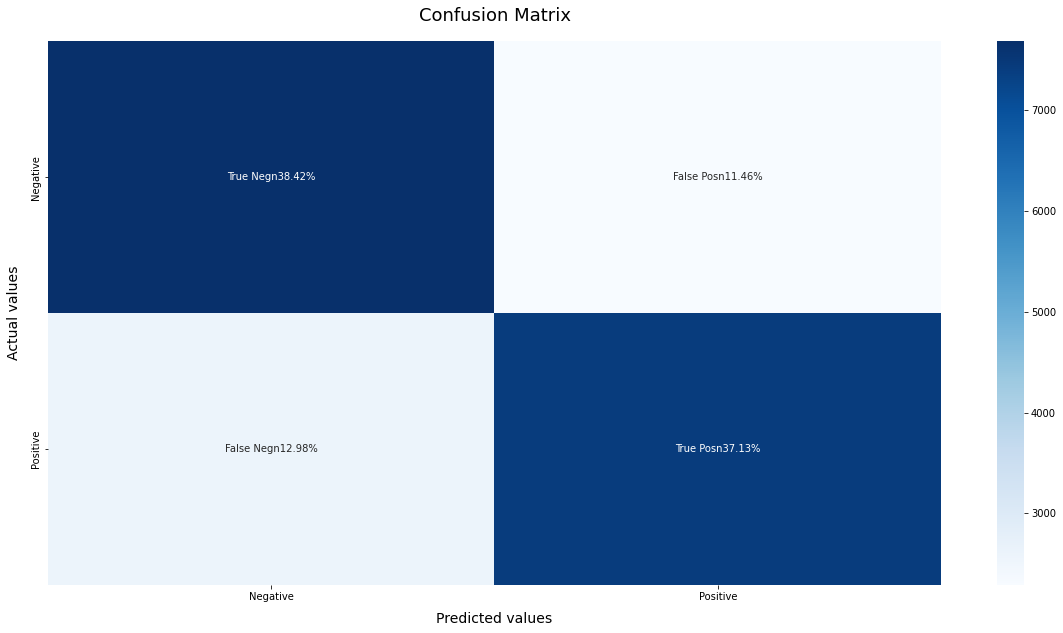

In [71]:
Percp = Perceptron(random_state=0)
Percp.fit(X_train, y_train)
model_Evaluate(Percp)
y_pred4 = Percp.predict(X_test)

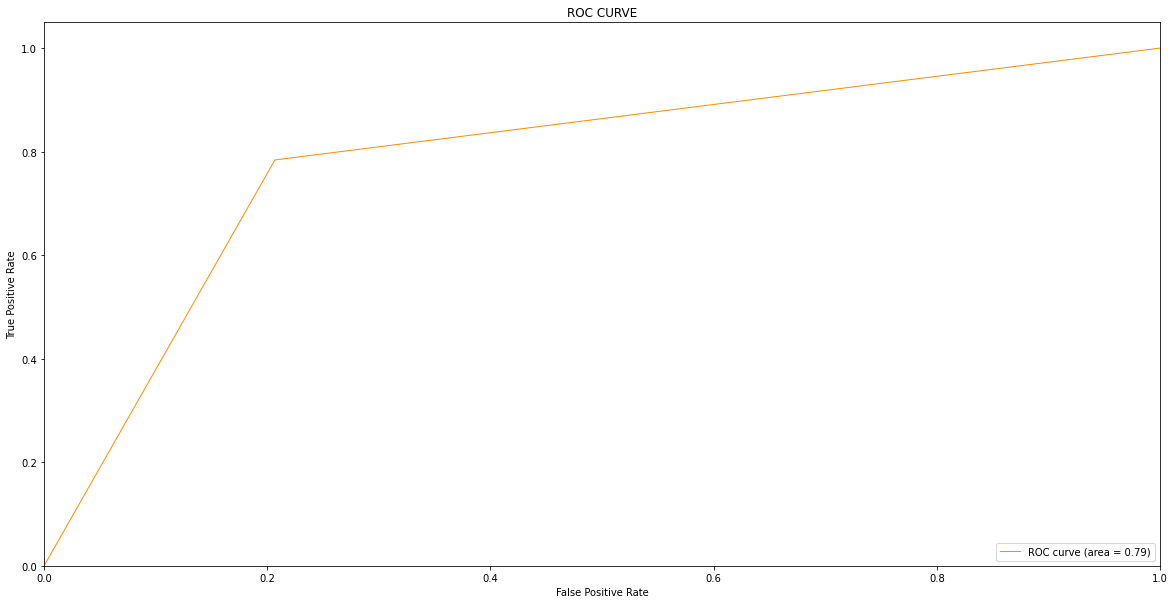

In [72]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Decision-Tree**

# **Prediction of Tweet from the User**

In [59]:
import pickle
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(LRmodel, pickle_out) 
pickle_out.close()

In [60]:
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

In [61]:
test = ["This is unlike any kind of adventure movie my eyes have ever seen in such a long time, the characters, the musical score for every scene, the story, the beauty of the landscapes of Pandora, the rich variety and uniqueness of the flora and fauna of Pandora, the ways and cultures and language of the natives of Pandora, everything about this movie I am beyond impressed and truly captivated by. Sam Worthington is by far my favorite actor in this movie along with his character Jake Sulley, just as he was a very inspiring actor in The Shack Sam Worthington once again makes an unbelievable mark in one of the greatest and most captivating movies you'll ever see. "]

In [62]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [63]:
review = re.sub('[^a-zA-Z]', ' ', test[0])
review = review.lower()
review = review.split()
review = [porter.stem(word) for word in review if not word in set(stop_words)]
test_processed =[ ' '.join(review)]

In [64]:

test_input = vectoriser.transform(test_processed)

test_input.shape

(1, 1599246)

In [69]:
import joblib
joblib.dump(vectoriser, 'vectorizer.pkl')

['vectorizer.pkl']

In [67]:
res=classifier.predict(test_input)

In [68]:
print(res[0])

1
